In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import numpy as np

In [2]:
varme = pd.read_csv("./varme.csv")
kulde = pd.read_csv("./kulde.csv")

## oppgave 2:
Hva er totalforbruket av romvarme for 2018? Hva er totalforbruket for hver av årets 12 måneder? Vis resultatene som en graf.

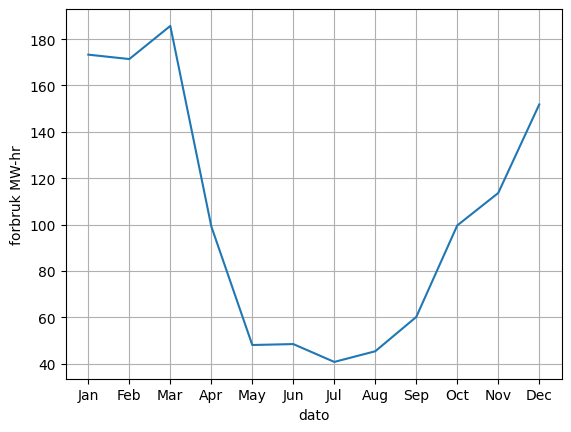

<function matplotlib.pyplot.show(close=None, block=None)>

In [3]:
varme["Timestamp"] = pd.to_datetime(varme["Timestamp"], format="%d-%b-%y %H:%M:%S")
varme.at[0, "Timestamp"] = varme.at[0, "Timestamp"] - pd.DateOffset(months=1)
varme['maaned'] = varme['Timestamp'].dt.to_period('M')
maaneder_v = varme.groupby('maaned').tail(1)
maaneder_v.loc[:, 'Value (MW-hr)'] = maaneder_v['Value (MW-hr)'].diff()
maaneder_v = maaneder_v.drop(0)

plt.plot(list(range(0, len(maaneder_v))), maaneder_v["Value (MW-hr)"])

plt.xlabel("dato")
plt.ylabel("forbruk MW-hr")
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

plt.show


### forklaring av kode

jeg finner forbruket per måned ved å ta forbruket på slutten av måneden og trekke fra forbruket på slutten av forrige måned. Jeg finner forbruket på slutten av hver måned ved å gi hver rad en kollonne for måneden den tilhører med to_period('M') og velger så den siste av hver måned med .groupby('maaned').tail(1). Jeg finner forskjellen mellom forbruket i hver rad med maaneder['Value (MW-hr)'].diff(). For å få en gyldig verdi for januar sier jeg at den hører til måneden før og fjerner den igjen før jeg plotter (fordi første raden i dataframen til .diff blir NaN).

kilder jeg brukte for å komme fram til denne koden:

[finn differanse mellom hver linje i pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)

[gruppere rader i dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

[offset dato for rad i dataframe](https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.DateOffset.html)

[finn periode for rad i dataframe](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html)

## oppgave 3: 
Hva er forbruket av romvarme for hver av dagene i disse månedene? Inspiser dagsforbruket for hver av disse to månedene ved hjelp av et spredningsplott. Finnes det noen ekstreme verdier (outliers) i disse to månedene?

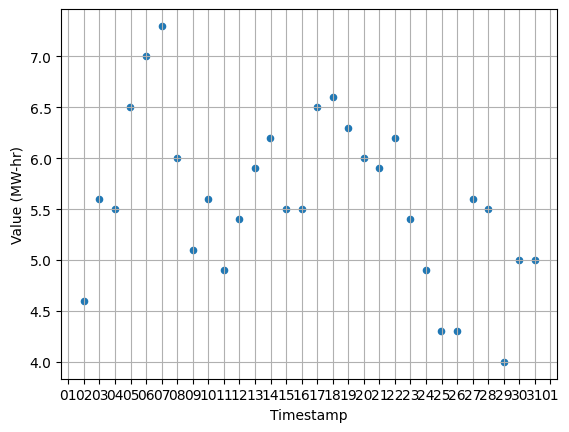

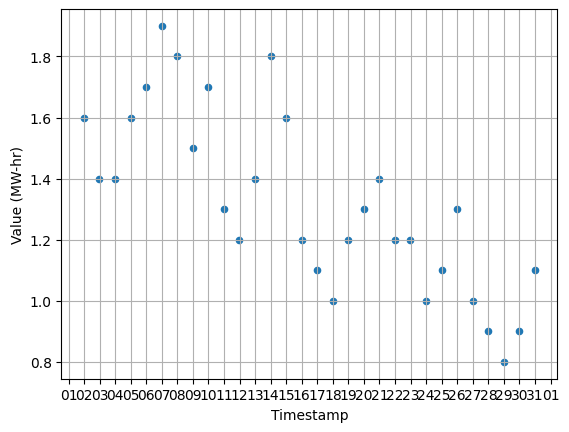

In [4]:
varme["Timestamp"] = pd.to_datetime(varme["Timestamp"], format="%d-%b-%y %H:%M:%S")
varme['dag'] = varme['Timestamp'].dt.to_period('D')
dager_v = varme.groupby("dag").tail(1)
dager_v.loc[:,"Value (MW-hr)"] = dager_v['Value (MW-hr)'].diff()

dager_jan = dager_v.loc[
(dager_v['Timestamp'] > "2018-01-01") & 
(dager_v['Timestamp'] < "2018-01-31")] 
dager_jul = dager_v.loc[
(dager_v['Timestamp'] > "2018-07-01") & 
(dager_v['Timestamp'] < "2018-07-31")]

dager_jan.plot.scatter("Timestamp", "Value (MW-hr)")
plt.gca().xaxis.set_major_locator(DayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%d"))
plt.grid()

dager_jul.plot.scatter("Timestamp", "Value (MW-hr)")
plt.gca().xaxis.set_major_locator(DayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%d"))
plt.grid()

plt.show()

### forklaring av kode

jeg bruker samme teknikker som i forrige oppgave, men gir varme dataframen en kolonne for dag også. Jeg lager så en ny dataframe hvor jeg filtrerer ut kun timestamps om hører til januar og juli.

kilder jeg brukte for å komme fram til denne koden:
[boolean masking for å filtrere dataframes](https://towardsdatascience.com/boolean-masking-with-pandas-b21b7714d0b6)
 
[datodager på x aksen](https://matplotlib.org/stable/api/dates_api.html)

## Oppgave 4
 Hva er gjennomsnittlig dagsforbruk av romvarme disse to månedene? Hva er standardavviket?

In [208]:
np.mean(dager_jan["Value (MW-hr)"])

5.60333333333333

In [34]:
np.mean(dager_jul["Value (MW-hr)"])

1.320000000000012

In [35]:
np.std(dager_jan["Value (MW-hr)"], ddof=1)

0.7919784624959691

In [36]:
np.std(dager_jul["Value (MW-hr)"], ddof=1)

0.2952497481677353

### forklaring av kode

jeg bruker funksjoner fra numpy for å regne ut gjennomsnitt og standardavvik.

[numpy mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

## Oppgave 5

Funksjonen numpy.std tar argumentet ddof. Hvorfor må du gi argumen- tet ddof = 1 når du skal bruke funksjonen til å regne ut standardavviket?

ddof står for *"delta degrees of freedom"*. Bruken forklarest lettest ved å vise hvor den kommer inn i formelen for standardavviket:

$$
\sqrt{\sum\frac{\overline{x}-x_i)^2}{n-\text{ddof}}}
$$

ved å sette ddof til 1 får vi divisjon med $n-1$ istedenfor $n$. i vårt tilfelle er det n-1 vi vil ha fordi på grunn av antallet uavhengige differanser. Dette kalles presis utvalgsvarians.

[numpy standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html)
[wiki standard deviation](https://en.wikipedia.org/wiki/Standard_deviation)

## Oppgave 6

Presenter forbruket i månedene januar og juli som et boksplott.

Text(0, 0.5, 'MW-hr')

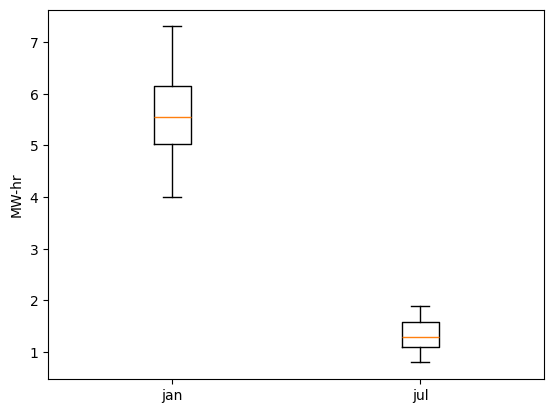

In [6]:
plt.boxplot([dager_jan["Value (MW-hr)"], dager_jul["Value (MW-hr)"]])
plt.xticks([1, 2], ["jan", "jul"])
plt.ylabel("MW-hr")

## forklaring av kode

for å plotte dagene som boksplot bruker jeg [matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

## Oppgave 7

Lag et histogram som viser forbruket av romvarme (i hele 2018).

Text(0.5, 0, 'MW-hr')

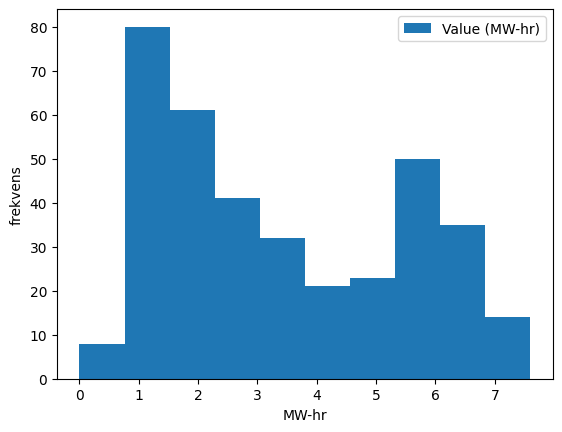

In [33]:
dager_v.drop(0).plot.hist()
plt.ylabel("frekvens")
plt.xlabel("MW-hr")

forklaring av kode:

jeg bruker dataframes innebygde abstraksjon av matplotlib for å plotte funksjonen. jeg dropper første kollononne fordi det er en kopi av den første målingen satt til dagen før (se tidligere oppgave)

## Oppgave 8

Lag varighetskurver for romoppvarming og kjøling

In [10]:
# lage dataframe for dagsforbruk av kjøling
kulde["Timestamp"] = pd.to_datetime(kulde["Timestamp"], format="%d-%b-%y %H:%M:%S")
kulde['dag'] = kulde['Timestamp'].dt.to_period('D')
dager_k = kulde.groupby("dag").tail(1)
dager_k.loc[:,"Value (MW-hr)"] = dager_k['Value (MW-hr)'].diff()

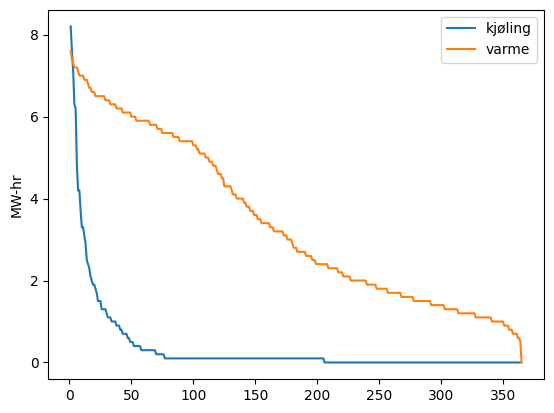

In [29]:
plt.plot(sorted(dager_k["Value (MW-hr)"], reverse=True), label="kjøling")
plt.plot(sorted(dager_v["Value (MW-hr)"], reverse=True), label="varme")
plt.ylabel("MW-hr")
plt.legend()
plt.show()

### forklaring av kode:

jeg lager først en dataframe for kjøling, så plotter jeg dem og sorterer etter bruken av mw i baklengs ordre, så det største kommer først.

## Oppgave 9

Hvilke likheter og forskjeller ser du mellom varighetskurver og persen- tilplott

jeg fant ingen gode kilder på hva et persentilplott er, googling ga ingen goder resultater, og ordet ser ikke ut til å være nevnt i boken heller, jeg måtte derfor (i tillegg til kildene nevnt i teksten under) ta i bruk løsningsforslaget for å se om jeg var på rett spor med svaret mitt.

jeg går utifra at persentil p[ engelsk er persetnile og bruker [wikipedias definisjon av persentiler](https://en.wikipedia.org/wiki/Percentile) og [How to Construct a Percentile Graph]() for å komme til konklusjonen at persentiler måler hvor stor del av det totale uvalget hver verdi er. Det er altså dette som plottes på y-aksen og på x aksen har man selve verdien. Dette er altså i motsetning til varighetskurven som har mw på y aksen og dag på x-aksen.

### Oppgave 10

Hva forteller disse varighetskurvene? Hvilke sammenheng ser du mellom varighetskurven for romoppvarming og histogrammet fra oppgave 7?

Varighetskurven sier meg at det brukes mer strøm på varme enn kjøling. Histogrammet har to topper på rundt 6 og 1 mw-hr, noe som også reflekteres i varighetskurven, side det er flatepartier her. Dette betyr at det har vært mange dager med 1 og 6 mw-hr forbruk.